# Lab: Joining and Analyzing Movie and Review Data

## Objective:
This lab exercise is designed to help students not only perform data joining operations but also to conduct deeper analysis using the pandas library in Python.
By working with the movie and review datasets, students will learn how to derive
insights and perform complex data manipulations.

## Datasets Description:
1. Movies Dataset ( `movies.csv` ):
* Columns:
  * `movie_id` : Unique identifier for each movie
  * `title` : Title of the movie
  * `genre` : Genre of the movie
  * `release_year` : Year the movie was released

2. Reviews Dataset ( `reviews.csv` ):
* Columns:
  * `review_id` : Unique identifier for each review
  * `movie_id` : Identifier linking the review to a movie
  * `reviewer` : Name of the reviewer
  * `rating` : Rating given by the reviewer (out of 10)
  * `review_date` : Date when the review was posted

## Tasks:
1. **Data Preparation and Exploration:**
    * Load the `movies.csv` and `reviews.csv` datasets into pandas dataframes.
    * Display summary statistics and the first few rows of each dataframe to understand their structure.

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
# Load the `movies.csv` and `reviews.csv` datasets into pandas dataframes.
df_movies = pd.read_csv('./movies.csv', header=0)
df_reviews = pd.read_csv('./reviews.csv', header=0)

In [4]:
# Display summary statistics and the first few rows of each dataframe to understand their structure.
df_movies.head()

,movie_id,title,genre,release_year
0,1,The Shawshank Redemption,Drama,1999
1,2,The Godfather,Drama,1987
2,3,The Dark Knight,Drama,1993
3,4,Schindler's List,Crime,2002
4,5,Pulp Fiction,Action,1980


In [5]:
df_reviews.head()

,review_id,movie_id,reviewer,rating,review_date
0,1,96,Jane Doe,8.0,2020-02-17
1,2,90,Victor Scott,1.8,2020-08-22
2,3,32,Yara Baker,1.8,2020-03-10
3,4,77,Victor Scott,5.2,2020-04-24
4,5,16,Mia Martinez,6.3,2020-04-13


2. **Highest Rated Movies:**
    * Perform an inner join on the `movies` and `reviews` dataframes based on the `movie_id` column.
    * Calculate the average rating for each movie.
    * Identify the top 10 high-rated movies.
    * Display the titles and average ratings of these top 10 movies.

In [6]:
# Inner join on the `movies` and `reviews` dataframes based on the `movie_id` column.
df_merged = pd.merge(df_movies, df_reviews, on='movie_id', how='inner')
df_merged.head()

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12


In [7]:
# Calculate the average rating for each movie.
average_ratings = df_merged.groupby('title')['rating'].mean().reset_index()
average_ratings.head()

,title,rating
0,3 Idiots,3.300000
1,A Beautiful Mind,7.625000
2,A Clockwork Orange,7.300000
3,Alien,3.133333
4,Aliens,5.400000


In [11]:
# Identify the top 10 high-rated movies and display the titles and average ratings of these top 10 movies.
top_10_movies = average_ratings.sort_values(by='rating', ascending=False).head(10)
top_10_movies[['title', 'rating']]

,title,rating
66,The Dark Knight,9.800
91,Vertigo,9.350
17,City Lights,9.250
35,Jaws,8.600
28,Grave of the Fireflies,8.000
56,Scarface,8.000
69,The Empire Strikes Back,8.000
44,North by Northwest,7.650
1,A Beautiful Mind,7.625
45,Oldboy,7.500


3. **Genre Analysis:**
    * Group the joined dataframe by `genre` and calculate the average rating for each genre.
    * Determine which genre has the highest average rating.
      - Sci-Fi
    * Display the genres along with their average ratings.

In [18]:
# Group the joined dataframe by `genre` and calculate the average rating for each genre.
average_genre_ratings = df_merged.groupby('genre')['rating'].mean().reset_index()

# Display the genres along with their average ratings.
average_genre_ratings.sort_values(by='rating', ascending=False)

,genre,rating
5,Sci-Fi,6.118421
4,Fantasy,5.768421
1,Biography,5.279310
3,Drama,5.204478
0,Action,5.109375
2,Crime,4.901493


4. **Reviewer Analysis:**
* Identify the top 5 reviewers who have given the most reviews.
* Calculate the average rating given by each of these top 5 reviewers.
* Display the reviewer names and their average ratings.

In [20]:
# Identify the top 5 reviewers who have given the most reviews.
top_reviewers = df_reviews.groupby('reviewer').size().nlargest(5).reset_index(name='review_count')
top_reviewers

,reviewer,review_count
0,Tom Young,18
1,Uma King,16
2,Henry Harris,15
3,John Smith,14
4,Ivy White,13


In [25]:
# Calculate the average rating given by each of these top 5 reviewers.
top_reviewers_avg_rating = df_reviews[df_reviews['reviewer'] \
    .isin(top_reviewers['reviewer'])] \
    .groupby('reviewer')['rating'] \
    .mean() \
    .reset_index(name='average_rating')

# Display the reviewer names and their average ratings.
top_reviewers_avg_rating

,reviewer,average_rating
0,Henry Harris,4.473333
1,Ivy White,4.669231
2,John Smith,4.542857
3,Tom Young,5.400000
4,Uma King,5.500000


5. **Time-Based Analysis:**
    * Analyze how movie ratings have changed over time.
    * Group the joined dataframe by the month extracted from the review_date column and calculate the average rating for each month.
    * Create a line plot showing the trend of average movie ratings over time.
    * Discuss any observable trends.
      * Average film ratings were higher in March and May.
      * This is expected to be influenced by the fact that the Academy Awards are announced in March and the Cannes International Film Festival is held in May.

In [27]:
# Group the joined dataframe by the month extracted from the review_date column and calculate the average rating for each month.
df_merged['review_date'] = pd.to_datetime(df_merged['review_date'])
df_merged['month'] = df_merged['review_date'].dt.month
average_monthly_ratings = df_merged.groupby('month')['rating'].mean().reset_index()
average_monthly_ratings

,month,rating
0,1,5.209677
1,2,4.755172
2,3,5.583871
3,4,5.213333
4,5,6.048387
5,6,5.623333
6,7,5.338710
7,8,4.858065
8,9,5.456667
9,10,5.138462


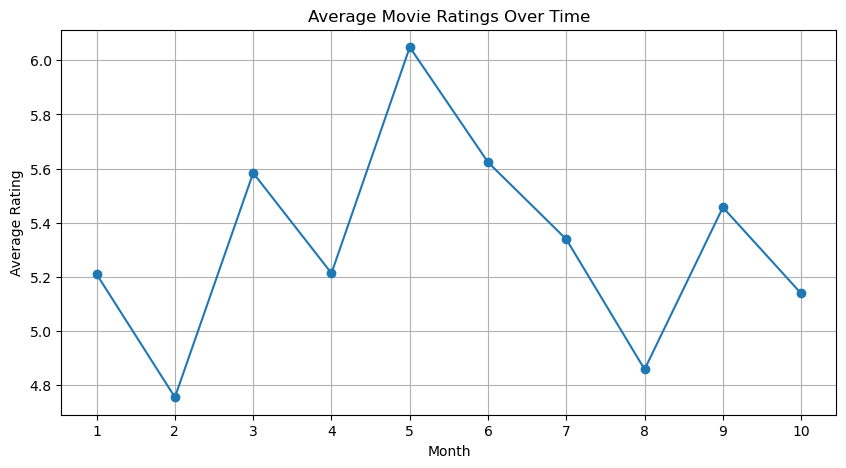

In [28]:
# Create a line plot showing the trend of average movie ratings over time.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(average_monthly_ratings['month'], average_monthly_ratings['rating'], marker='o')
plt.title('Average Movie Ratings Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(average_monthly_ratings['month'])
plt.grid()
plt.show()

6. **Movies with Most Reviews:**
* Identify the top 10 movies that have received the most reviews.
* Display the titles of these movies along with the number of reviews they have received.

In [32]:
# Identify the top 10 movies that have received the most reviews.
top_10_movies_reviews = df_merged.groupby('title').size().nlargest(10).reset_index(name='review_count')
# Display the titles of these movies along with the number of reviews they have received.
top_10_movies_reviews

,title,review_count
0,Full Metal Jacket,7
1,Interstellar,7
2,Capernaum,6
3,It's a Wonderful Life,6
4,Memento,6
5,Paths of Glory,6
6,Shutter Island,6
7,The Revenant,6
8,The Truman Show,6
9,Amélie,5


7. **Distribution of Ratings:**
    * Create a histogram to visualize the distribution of ratings.
    * Analyze the distribution and discuss any skewness or patterns observed in the ratings.
      * The histogram shows that the distribution of ratings is smooth and unbiased.

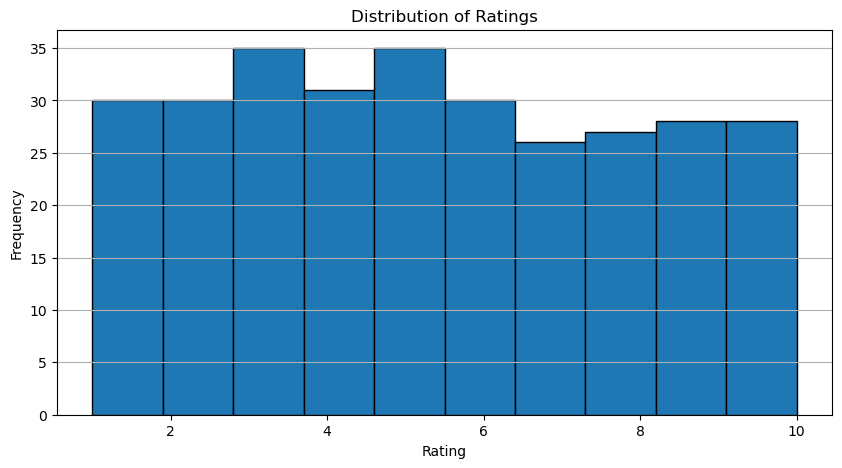

In [33]:
# Create a histogram to visualize the distribution of ratings.
plt.figure(figsize=(10, 5))
plt.hist(df_reviews['rating'], bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

8. **Impact of Release Year:**
    * Analyze if there is any correlation between the release year of a movie and its average rating.
    * Create a scatter plot showing the relationship between the release year and the average rating.
    * Discuss any observable patterns or correlations.

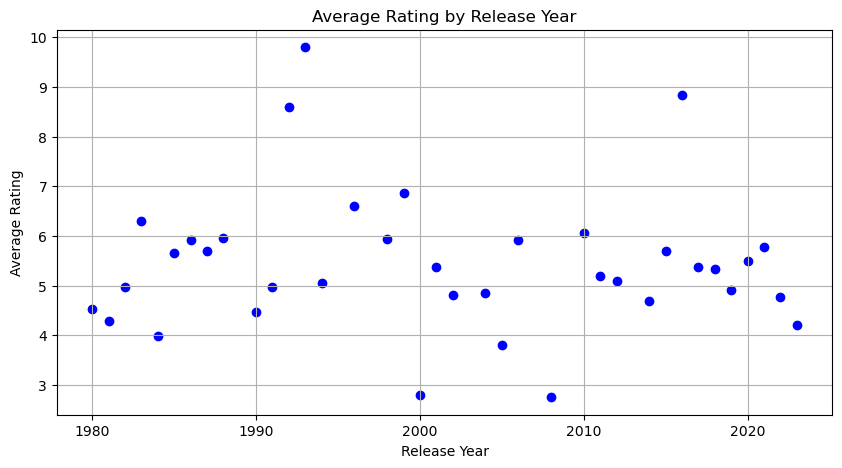

In [34]:
# Create a scatter plot showing the relationship between the release year and the average rating.
average_rating_by_year = df_merged.groupby('release_year')['rating'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.scatter(average_rating_by_year['release_year'], average_rating_by_year['rating'], color='blue')
plt.title('Average Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

9. **Reviewer Consistency:**
    * For each reviewer, calculate the standard deviation of their ratings.
    * Identify the most and least consistent reviewers based on the standard deviation of their ratings.
    * Display the names of these reviewers along with their standard deviations.

In [36]:
# For each reviewer, calculate the standard deviation of their ratings.
reviewer_consistency = df_reviews.groupby('reviewer')['rating'].std().reset_index(name='std_dev')
# Display the names of these reviewers along with their standard deviations.
reviewer_consistency.head()

,reviewer,std_dev
0,Alice Johnson,3.293094
1,Bob Brown,2.961681
2,Charlie Davis,2.205145
3,Emily Evans,2.277645
4,Frank Wilson,2.596618


In [38]:
# Identify the most consistent reviewers based on the standard deviation of their ratings.
most_consistent_reviewer = reviewer_consistency.loc[reviewer_consistency['std_dev'].idxmin()]
most_consistent_reviewer

reviewer    Noah Robinson
std_dev          1.773415
Name: 14, dtype: object

In [39]:
# Identify the least consistent reviewers based on the standard deviation of their ratings.
least_consistent_reviewer = reviewer_consistency.loc[reviewer_consistency['std_dev'].idxmax()]
least_consistent_reviewer

reviewer    Zane Carter
std_dev        3.567718
Name: 26, dtype: object

10. **Challenge Task - Genre Popularity Over Time:**
    * Analyze how the popularity of different genres has changed over time.
    * Group the joined dataframe by `genre` and the year extracted from the `review_date` column.
    * Calculate the number of reviews for each genre per month.
    * Create a line plot for each genre showing the number of reviews over time.
    * Discuss any trends or shifts in genre popularity over time.
      * The Drama and Crime genres maintained an average reviewer count of 5 or higher throughout the year.
      * There is a negative correlation between crime and the popularity of the action genres.
      * There is a negative correlation between the popularity of the drama and biography genres.
      * There is a weak negative correlation between the popularity of the Fantasy and Sci-Fi genres

In [40]:
# Group the joined dataframe by `genre` and the year and the month extracted from the `review_date` column.
df_merged['year'] = df_merged['review_date'].dt.year
df_merged['month'] = df_merged['review_date'].dt.month
df_merged.head()

,movie_id,title,genre,release_year,review_id,reviewer,rating,review_date,month,year
0,1,The Shawshank Redemption,Drama,1999,40,Ivy White,4.4,2020-04-04,4,2020
1,1,The Shawshank Redemption,Drama,1999,151,Quinn Walker,7.7,2020-01-23,1,2020
2,1,The Shawshank Redemption,Drama,1999,153,Sophia Allen,9.0,2020-01-27,1,2020
3,1,The Shawshank Redemption,Drama,1999,167,Henry Harris,8.7,2020-06-17,6,2020
4,3,The Dark Knight,Drama,1993,129,Uma King,9.8,2020-03-12,3,2020


In [43]:
# Calculate the number of reviews for each genre per month.
genre_monthly_reviews = df_merged.groupby(['genre', 'year', 'month']).size().reset_index(name='review_count')
genre_monthly_reviews.head()

,genre,year,month,review_count
0,Action,2020,1,1
1,Action,2020,2,4
2,Action,2020,3,3
3,Action,2020,4,7
4,Action,2020,5,1


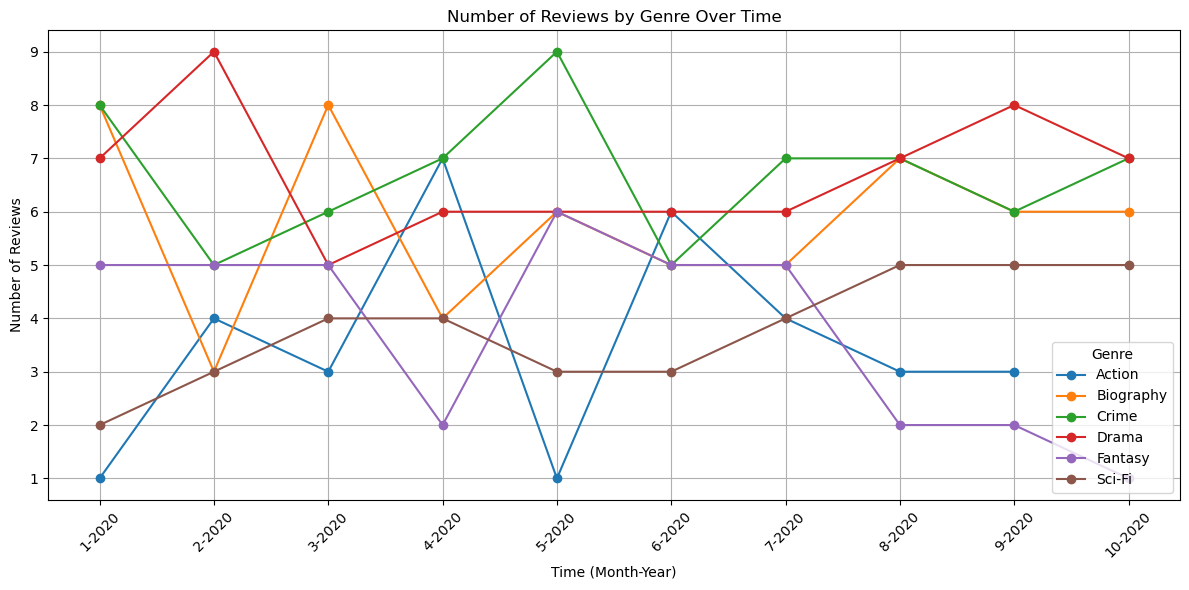

In [44]:
# Create a line plot for each genre showing the number of reviews over time.
plt.figure(figsize=(12, 6))
for genre in genre_monthly_reviews['genre'].unique():
    genre_data = genre_monthly_reviews[genre_monthly_reviews['genre'] == genre]
    plt.plot(genre_data['month'].astype(str) + '-' + genre_data['year'].astype(str), genre_data['review_count'], marker='o', label=genre)

plt.title('Number of Reviews by Genre Over Time')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.grid()
plt.tight_layout()
plt.show()